<a href="https://colab.research.google.com/github/Nov05/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/others/2019_06_13_office_hour_DS5_Sprint_Challenge_preview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# modified by nov05
# originally written by Elizabeth Ter Sahakyan
# DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments
# others/

In [0]:
from scipy import stats
from scipy.stats import norm, sem, t, ttest_1samp, ttest_ind
from numpy import sqrt 
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# normal distribution
sample1 = norm(20.14458, 6.4147).rvs(249)
sample2 = norm(30.48101, 6.10771).rvs(79)
sample1[:10]

array([12.19990106, 18.19283539, 30.56896809, 15.13903528, 20.9396646 ,
       24.18497716, 16.39799059, 14.65927278, 17.12496045, 22.55539453])

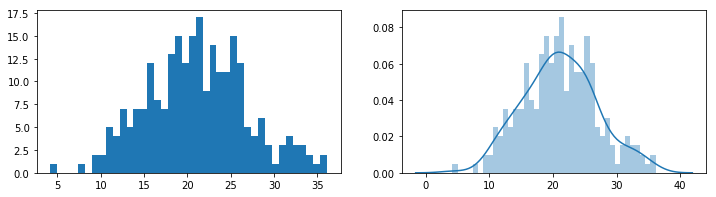

In [69]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.hist(sample1, bins=40)
plt.subplot(1, 2, 2)
sns.distplot(sample1, bins=40);

In [35]:
# t-statistic for two samples
print(len(sample1), len(sample2))
print(ttest_ind(sample1, sample2, equal_var=True))
print(ttest_ind(sample1, sample2, equal_var=False)) # important
t1 = ((sample1.mean() - sample2.mean()) 
      / sqrt((sample1.var(ddof=1)/len(sample1)) 
             + (sample2.var(ddof=1)/len(sample2)))
     )
print(t1)

249 79
Ttest_indResult(statistic=-13.775221326483631, pvalue=2.4312337112832564e-34)
Ttest_indResult(statistic=-14.500980995809403, pvalue=6.80173589641557e-30)
-14.500980995809403


https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html  
*Three variations of Levene’s test are possible. The possibilities and their recommended usages are:*  
‘median’ : Recommended for skewed (non-normal) distributions  
‘mean’ : Recommended for symmetric, moderate-tailed distributions.  
‘trimmed’ : Recommended for heavy-tailed distributions.  

In [36]:
stats.levene(sample1, sample2, 
             center='mean') # default 'median'

LeveneResult(statistic=0.7896061630301027, pvalue=0.3748744172102779)

In [0]:
# Confidence level + alpha = 1
alpha = 0.05
q = 1 - alpha/2

We reject the null hypothesis if

|T| > t1-α/2,ν


so T = -12.1
and alpha = 0.975


We reject the null hypothesis

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html  

In [44]:
# t.ppf takes 2 arguements (probaility, n-1)
# if you are using two samples, use the one w/ the smaller n
# as we increase dof the t distribution aprroximates the normal dist 
# (t score approaches z-score) as t dist approaches normal

# t distribution graph represents a distribution of sample means
# if you have a population, and sample from the population repeatedly, and plot
# the dist of means, it will have a t dist (thats w/ a small sample size)
# once the sample size gets larger it becomes normal and you can use approaches 
# that derive from the normal dist

# the dof of the t dist is the number of sample means 

# you can use the https://homepage.divms.uiowa.edu/~mbognar/applets/t.html 
# calc for looking at the t dist


t_stat = t.ppf(q, 1000)
t_stat

1.9623390808264074

In [45]:
# standard error of measure
stderr = sem(sample1)
stderr

0.3690819851203897

In [46]:
# margin of error
MOE = t_stat * stderr
MOE

0.7242640034307313

In [48]:
# confidence interval
ci = ((sample1.mean()-MOE), (sample1.mean()+MOE))
ci

(20.3898194703056, 21.838347477167066)

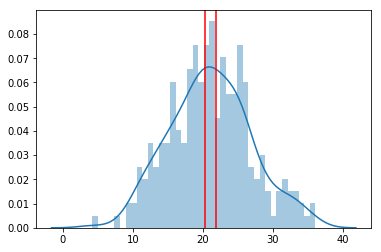

In [56]:
# t-statistic only applies to t-distribution
# this is a sample distribution

# as sample size gets bigger, confidence interval estimates get smaller bc we can be more precise
# as the confidence level we are looking for gets bigger, our confidence interval is smaller 
# as our confidence level goes up, the confidence interval gets bigger

# alpha value and confidence interval move in opposite directions
# if alpha decreases, the confidence level and the confidence interval both increase

ax = sns.distplot(sample1, bins=40)
ax.axvline(x=ci[0], color='r')
ax.axvline(x=ci[1], color='r');


In [57]:
# to do a 1 sample t-test:
# ttest_1samp(<sample 1>, <null hypothesis>, nan_policy='omit' )

# to do a 2 sample t test:
ttest_ind(sample1, sample2, nan_policy='omit',
          equal_var=False # default True
         )

Ttest_indResult(statistic=-14.500980995809403, pvalue=6.80173589641557e-30)

https://homepage.stat.uiowa.edu/~mbognar/applets/chisq.html  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html  

In [0]:
# chi squared tests for independence between two variables

# chi squared value increases, p value is lower
# chi squared tests for independence btwn categorical variables

# dof makes the chi squared values very broad
# you can calculate dof: (rows - 1) * (cols - 1)

# scipy.stats can be used for chi squared tests
# use scipy.stats.chi2_contingency (contingency table here w/o the margins!!)
# returns [chi squared stat, p- val , dof, expected value contingency table]


<img src="https://image.slidesharecdn.com/chisquaretestfinal-140131063217-phpapp02/95/chi-square-test-final-39-638.jpg" width="300">    

Expected Value Calculation


\begin{align}
expected_{i,j} =\frac{(row_{i} \text{total})(column_{j} \text{total}) }{(\text{total observations})}  
\end{align}

## Chi-Squared Statistic with Numpy

\begin{align}
\chi^2 = \sum \frac{(observed_{i}-expected_{i})^2}{(expected_{i})}
\end{align}

For the $observed$ values we will just use a version of our contingency table without the margins as a numpy array. In this way, if our observed values array and our expected values array are the same shape, then we can subtract them and divide them directly which makes the calculations a lot cleaner. No for loops!

In [0]:
# you can use this after you have the numpy arrays in the same shape
chi_squared = ((observed - expected)**2/(expected)).sum()

4 parts to hypothesis tests:

- null hypothesis
- alt hypothesis
- test statistic (t statistic or chi squared statistic)  **test statistic is just a general term for any statistic that comes out of a hypothesis test**  
- p-value

